In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import seaborn as sns
import seaborn as sns
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("Case.csv")
df
df.head()



,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,mau
0,41,17,12,35.9,11.90,0.504108,3.767992,0
1,30,13,8,46.7,17.88,1.352694,6.997266,0
2,40,15,14,61.8,10.64,3.438997,3.136523,0
3,41,15,14,72.0,29.67,4.165668,17.196732,0
4,57,7,37,25.6,15.86,1.498199,2.561961,0


In [12]:
df.shape

(5000, 8)

In [13]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idade           5000 non-null   int64  
 1   experiencia     5000 non-null   int64  
 2   tempo_endereco  5000 non-null   int64  
 3   renda           5000 non-null   float64
 4   debito_renda    5000 non-null   float64
 5   cred_deb        5000 non-null   float64
 6   outros_debitos  5000 non-null   float64
 7   mau             5000 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 312.6 KB


In [14]:
df.describe()

# Estatística Descritiva
# Descrição dos dados 
# Presença de anomalias (observe o  maximo e a média em cada caso)

,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,mau
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,35.387200,8.703800,8.154000,47.676980,10.075984,1.628071,3.218582,0.251200
std,7.948403,7.194583,6.760786,51.793192,6.659336,3.053369,6.944523,0.433747
min,20.000000,0.000000,0.000000,12.100000,0.080000,0.005292,0.009373,0.000000
25%,29.000000,3.000000,3.000000,24.500000,5.050000,0.396181,0.990071,0.000000
50%,35.000000,7.000000,7.000000,34.500000,8.635000,0.906189,1.960223,0.000000
75%,41.000000,13.000000,12.000000,54.725000,13.682500,1.859147,3.789633,1.000000
max,58.000000,38.000000,37.000000,2461.700000,44.620000,139.580605,416.517425,1.000000


In [15]:
df.columns



Index(['idade', 'experiencia', 'tempo_endereco', 'renda', 'debito_renda',
       'cred_deb', 'outros_debitos', 'mau'],
      dtype='object')

In [16]:
print(df["mau"].value_counts())




0    3744
1    1256
Name: mau, dtype: int64


In [17]:
print(df["experiencia"].value_counts())



0     391
1     367
2     349
4     318
3     316
5     302
7     298
6     293
8     243
9     234
10    210
11    187
12    172
13    155
14    146
15    140
17    131
16    121
18     84
19     81
21     69
20     69
22     58
23     48
24     40
25     35
26     27
27     26
28     18
30     17
29     16
31      8
34      8
32      7
35      5
36      5
33      3
37      2
38      1
Name: experiencia, dtype: int64


In [18]:
print(df["idade"].value_counts())



33    250
31    228
32    227
36    216
29    214
28    212
30    212
37    209
34    205
35    201
26    192
39    192
38    190
41    180
40    175
27    171
43    161
42    156
25    151
44    141
24    139
45    134
46    107
23     98
47     84
48     83
49     81
22     79
50     62
21     54
51     53
52     35
54     28
53     27
55     21
20     18
56      9
57      3
58      2
Name: idade, dtype: int64


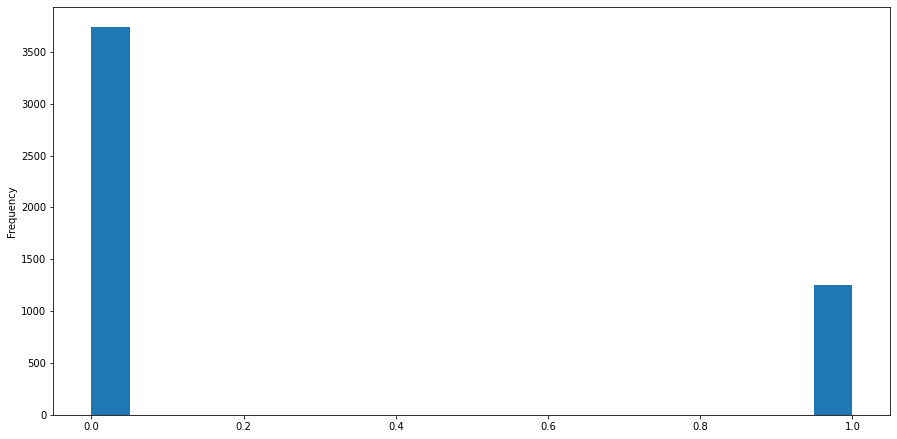

In [19]:
df["mau"].plot.hist(bins = 20,figsize=(15,7.5))

# distrição entre maus e bons pagadores 
#mau - se pagou o não o empréstimo bancário (0=pagou, 1=não pagou)
#maior número de pagantes 

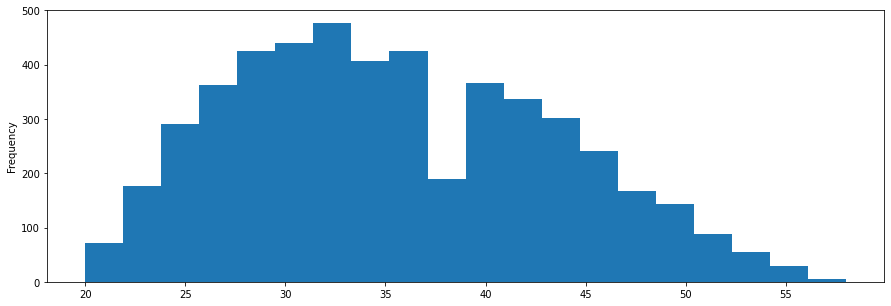

In [20]:
df["idade"].plot.hist(bins = 20,figsize=(15,5))
 
# faixa de idade com maior frequência 25-55 anos


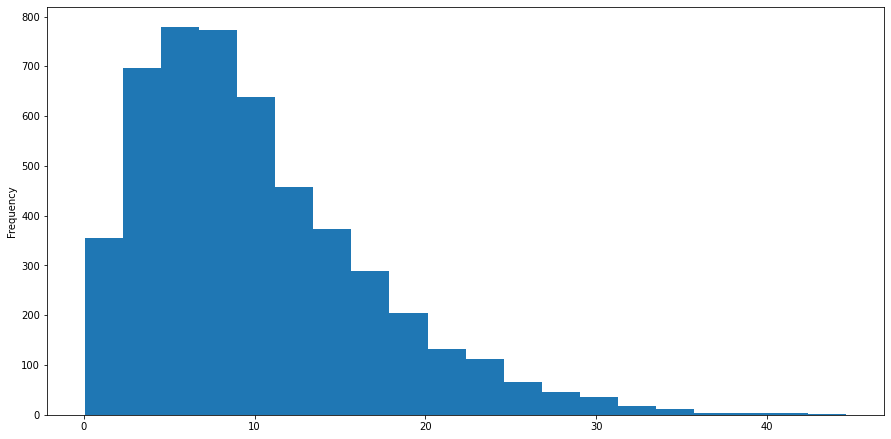

In [21]:
df["debito_renda"].plot.hist(bins = 20,figsize=(15,7.5))


#debito_renda - relação entre seus débitos (dívidas totais) e a renda anual

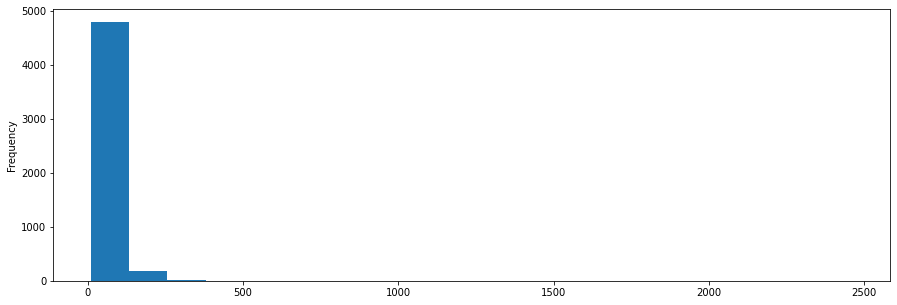

In [22]:
df["renda"].plot.hist(bins = 20,figsize=(15,5))

# maior frequência de usuários com faixa de renda entre 1000 e 4000 reais maior chance de pagamento 

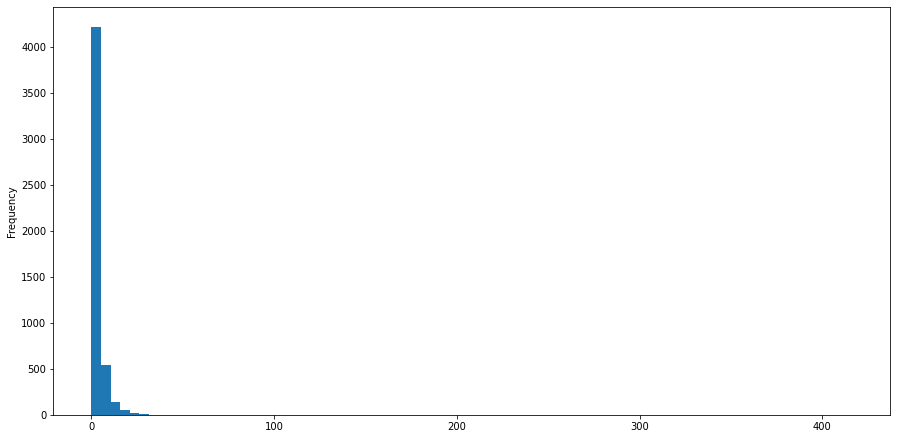

In [23]:
df["outros_debitos"].plot.hist(bins = 80,figsize=(15,7.5))

#

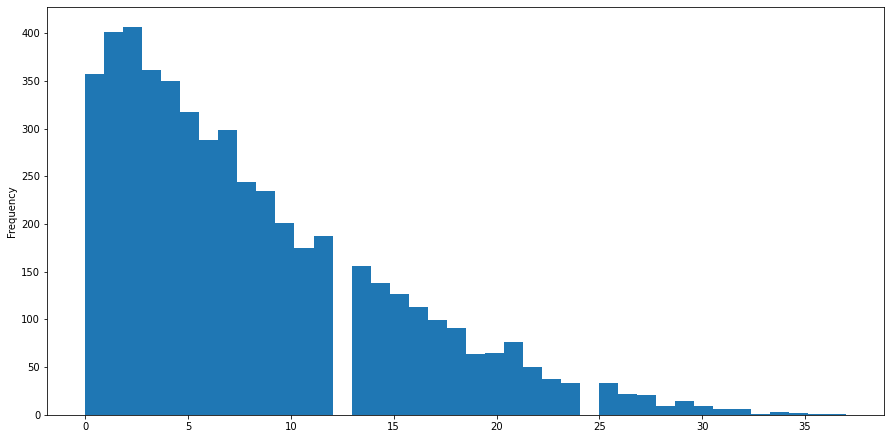

In [24]:
df["tempo_endereco"].plot.hist(bins = 40,figsize=(15,7.5))

# tempo_endereco - tempo que mora no mesmo endereço em anos
#maior número de usuários que mora no mesmo endereço há dez anos  com  maior chance de pagamento.


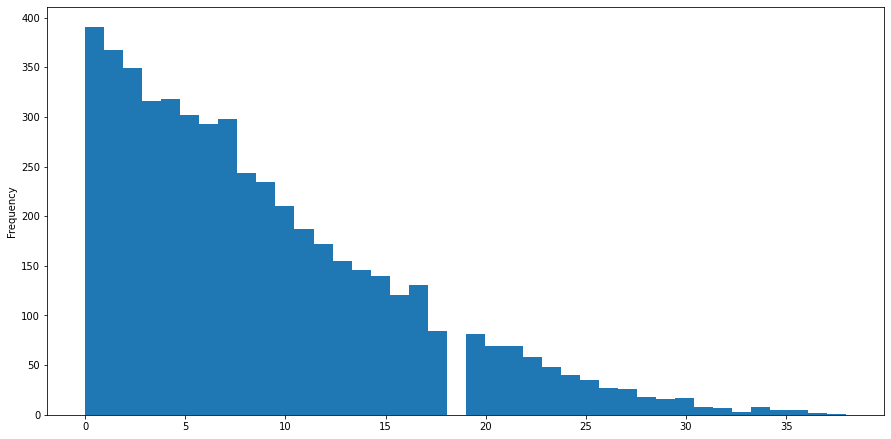

In [25]:
df["experiencia"].plot.hist(bins = 40,figsize=(15,7.5))

#experiencia - tempo de experiência em anos- frequência maior para menor tempo de experiência
#melhores pagadores com na faixa acima de 15 anos de experiência.

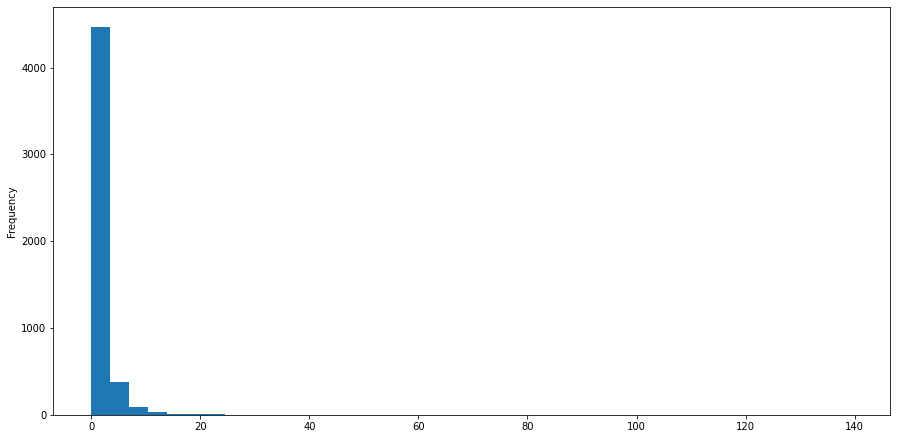

In [26]:
df["cred_deb"].value_counts()
df["cred_deb"].plot.hist(bins = 40,figsize=(15,7.5))

# cred_deb - razão entre seus créditos e débitos, maior número de pagadores com amior razão cred/deb

In [27]:
df.isnull().sum()

# Número de casos com  Nan.

idade             0
experiencia       0
tempo_endereco    0
renda             0
debito_renda      0
cred_deb          0
outros_debitos    0
mau               0
dtype: int64

In [28]:
df.isnull().sum()

#número de casos com null

idade             0
experiencia       0
tempo_endereco    0
renda             0
debito_renda      0
cred_deb          0
outros_debitos    0
mau               0
dtype: int64

In [29]:
df.head()

,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,mau
0,41,17,12,35.9,11.90,0.504108,3.767992,0
1,30,13,8,46.7,17.88,1.352694,6.997266,0
2,40,15,14,61.8,10.64,3.438997,3.136523,0
3,41,15,14,72.0,29.67,4.165668,17.196732,0
4,57,7,37,25.6,15.86,1.498199,2.561961,0


# Aplicando os modelos aos dados

---



---


- Aplicar a Classificação básica Vamos verificar o desempenho aplicando algoritmos de Regressão Logística e Árvore de Decisão.
- Antes de aplicar os algoritmos, os dados são divididos em conjuntos de treinamento e teste na proporção 2: 1 que são dados de teste 33% e dados de treinamento 67%
- 

In [30]:
# Implementação do modelo logístico precisa ser revisto pelo valor do threshold. Segue adiante no código.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


x_basic = df
y = df["mau"]

# Spliting the data into test and train sets
x_basic_tr,x_basic_te,y_tr,y_te = train_test_split(x_basic,y,test_size =.33,random_state=1)
logreg_basic = LogisticRegression()

# Training the basic logistic regression model with training set 
logreg_basic.fit(x_basic_tr,y_tr)

# Printing the coefficients
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)

# Predicting the output of the test cases using the algorithm created above
y_pre = logreg_basic.predict(x_basic_te)

# Validating the algorithm using various Performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a1 = accuracy_score(y_te,y_pre)
f1 = f1_score(y_te, y_pre, average="macro")
p1 = precision_score(y_te, y_pre, average="macro")
r1 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

intercept 
[-5.13641219]

coefficients 
[[-1.81967770e-03 -9.61099773e-02 -5.19598993e-02 -1.30880419e-03
   5.30910919e-02  2.11792124e-01  9.52073605e-03  9.48190042e+00]]

accuracy score :  1.0
f1 score :  1.0
precision score :  1.0
recall score :  1.0


In [31]:
#Matriz confusão 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1227    0]
 [   0  423]]


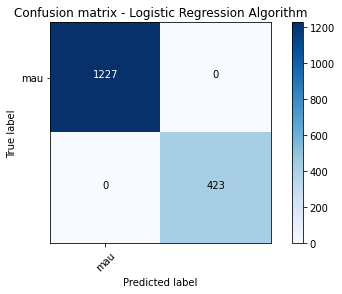

In [32]:


cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
                      title='Confusion matrix - Logistic Regression Algorithm')

plt.show()

accuracy score :  1.0
f1 score :  1.0
precision score :  1.0
recall score :  1.0
Confusion matrix, without normalization
[[1227    0]
 [   0  423]]


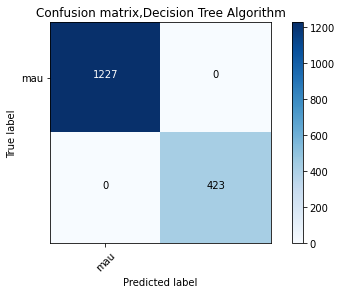

In [33]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 100
 
dectree_basic.fit(x_basic_tr,y_tr)


y_pre = dectree_basic.predict(x_basic_te)



a2 = accuracy_score(y_te,y_pre)
f2 = f1_score(y_te, y_pre, average="macro")
p2 = precision_score(y_te, y_pre, average="macro")
r2 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=7)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
                      title='Confusion matrix,Decision Tree Algorithm')

plt.show()

### Usando correlação de  Pearson para seleção de variável 

In [34]:
# Achando a relação entre todas variáveis e mau

df.corr(method='pearson')

,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,mau
idade,1.000000,0.559011,0.580612,0.400467,-0.019714,0.222039,0.202564,-0.184532
experiencia,0.559011,1.000000,0.328398,0.511006,-0.016297,0.286104,0.250384,-0.258780
tempo_endereco,0.580612,0.328398,1.000000,0.211169,-0.017647,0.103693,0.093347,-0.209655
renda,0.400467,0.511006,0.211169,1.000000,0.012391,0.741948,0.816931,-0.041060
debito_renda,-0.019714,-0.016297,-0.017647,0.012391,1.000000,0.366540,0.310966,0.379351
cred_deb,0.222039,0.286104,0.103693,0.741948,0.366540,1.000000,0.773914,0.186907
outros_debitos,0.202564,0.250384,0.093347,0.816931,0.310966,0.773914,1.000000,0.080372
mau,-0.184532,-0.258780,-0.209655,-0.041060,0.379351,0.186907,0.080372,1.000000


In [35]:


feat1=["debito_renda","cred_deb","outros_debitos"]


##### Agora que obtivemos os recursos com alta correlação com o recurso BAD, vamos executar os algoritmos de classificação e compará-los

accuracy score :  0.78
f1 score :  0.6345233976418384
precision score :  0.7281861448968799
recall score :  0.619717699283844
Confusion matrix, without normalization
[[1164   63]
 [ 300  123]]


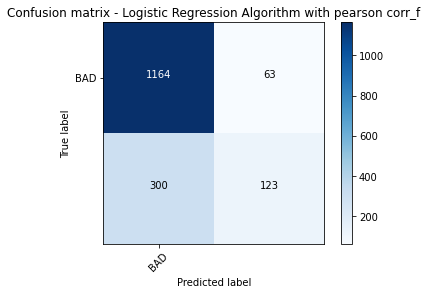

In [36]:
# Regressão Logística

x = df[feat1]
y = df["mau"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
a3 = accuracy_score(y_te,y_pre)
f3 = f1_score(y_te, y_pre, average="macro")
p3 = precision_score(y_te, y_pre, average="macro")
r3 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a3)
print("f1 score : ",f3)
print("precision score : ",p3)
print("recall score : ",r3)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Logistic Regression Algorithm with pearson corr_f')

plt.show()

accuracy score :  0.6866666666666666
f1 score :  0.5875037898587973
precision score :  0.5878545796308954
recall score :  0.5871698832995197

Confusion matrix, without normalization
[[971 256]
 [261 162]]


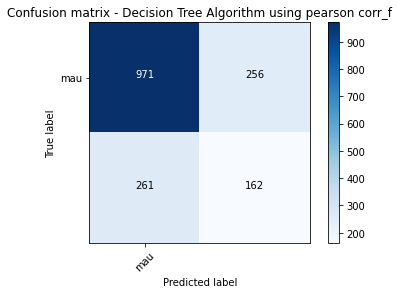

In [37]:
# Decision Tree classifier usando feat1

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a4 = accuracy_score(y_te,y_pre)
f4 = f1_score(y_te, y_pre, average="macro")
p4 = precision_score(y_te, y_pre, average="macro")
r4 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a4)
print("f1 score : ",f4)
print("precision score : ",p4)
print("recall score : ",r4)
print("")
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
title='Confusion matrix - Decision Tree Algorithm using pearson corr_f')

plt.show()

In [38]:
# Encontrando as melhores variáveis usando chi-squared

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
df_new = pd.DataFrame(SelectKBest(chi2, k=7).fit_transform(df.drop(["mau"],axis = 1),df["mau"]))

In [39]:
# dataframe containing the selected features

df_new.head()

,0,1,2,3,4,5,6
0,41.0,17.0,12.0,35.9,11.90,0.504108,3.767992
1,30.0,13.0,8.0,46.7,17.88,1.352694,6.997266
2,40.0,15.0,14.0,61.8,10.64,3.438997,3.136523
3,41.0,15.0,14.0,72.0,29.67,4.165668,17.196732
4,57.0,7.0,37.0,25.6,15.86,1.498199,2.561961


accuracy score :  0.8090909090909091
f1 score :  0.7204832158170736
precision score :  0.7592430801000754
recall score :  0.7012404122376552
Confusion matrix, without normalization
[[1132   95]
 [ 220  203]]


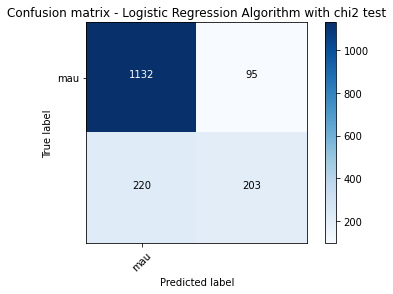

In [40]:
# RODANDO regressão logística após o teste chi2 

x = df_new
y = df["mau"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
y_pre = logreg.predict(x_te)
a5 = accuracy_score(y_te,y_pre)
f5 = f1_score(y_te, y_pre, average="macro")
p5 = precision_score(y_te, y_pre, average="macro")
r5 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a5)
print("f1 score : ",f5)
print("precision score : ",p5)
print("recall score : ",r5)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
 title='Confusion matrix - Logistic Regression Algorithm with chi2 test')

plt.show()


accuracy score :  0.7327272727272728
f1 score :  0.6459143041083478
precision score :  0.6474921321793863
recall score :  0.6444739230204558
Confusion matrix, without normalization
[[1013  214]
 [ 227  196]]


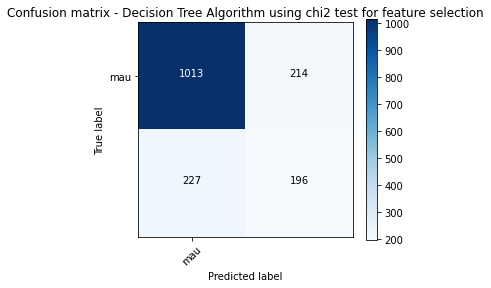

In [41]:
# Decision Tree classifier usando  variáveis do teste  chi2 

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a6 = accuracy_score(y_te,y_pre)
f6 = f1_score(y_te, y_pre, average="macro")
p6 = precision_score(y_te, y_pre, average="macro")
r6 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a6)
print("f1 score : ",f6)
print("precision score : ",p6)
print("recall score : ",r6)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
title='Confusion matrix - Decision Tree Algorithm using chi2 test for feature selection')

plt.show()

In [42]:
df.head()

,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,mau
0,41,17,12,35.9,11.90,0.504108,3.767992,0
1,30,13,8,46.7,17.88,1.352694,6.997266,0
2,40,15,14,61.8,10.64,3.438997,3.136523,0
3,41,15,14,72.0,29.67,4.165668,17.196732,0
4,57,7,37,25.6,15.86,1.498199,2.561961,0


### Usando f_classif para seleção de variável

In [43]:
from sklearn.feature_selection import f_classif

df_new2 = pd.DataFrame(SelectKBest(f_classif, k=7).fit_transform(df.drop(["mau"],axis=1),df["mau"]))
df_new2.head()

,0,1,2,3,4,5,6
0,41.0,17.0,12.0,35.9,11.90,0.504108,3.767992
1,30.0,13.0,8.0,46.7,17.88,1.352694,6.997266
2,40.0,15.0,14.0,61.8,10.64,3.438997,3.136523
3,41.0,15.0,14.0,72.0,29.67,4.165668,17.196732
4,57.0,7.0,37.0,25.6,15.86,1.498199,2.561961


accuracy score :  0.8090909090909091
f1 score :  0.7204832158170736
precision score :  0.7592430801000754
recall score :  0.7012404122376552
Confusion matrix, without normalization
[[1132   95]
 [ 220  203]]


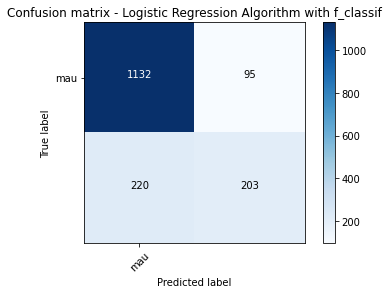

In [44]:
# Running the logistic regression algorithm using the features selected from f_classif test

x = df_new2
y = df["mau"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
a7 = accuracy_score(y_te,y_pre)
f7 = f1_score(y_te, y_pre, average="macro")
p7 = precision_score(y_te, y_pre, average="macro")
r7 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a7)
print("f1 score : ",f7)
print("precision score : ",p7)
print("recall score : ",r7)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
title='Confusion matrix - Logistic Regression Algorithm with f_classif')

plt.show()

accuracy score :  0.7327272727272728
f1 score :  0.646475811055374
precision score :  0.6478014178835265
recall score :  0.6452484581548723
Confusion matrix, without normalization
[[1012  215]
 [ 226  197]]


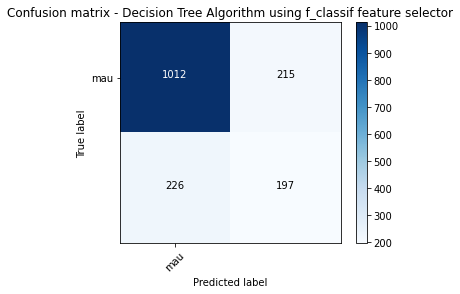

In [45]:
# Decision Tree classifier usando variáveis do teste  f_classif

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a8 = accuracy_score(y_te,y_pre)
f8 = f1_score(y_te, y_pre, average="macro")
p8 = precision_score(y_te, y_pre, average="macro")
r8 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a8)
print("f1 score : ",f8)
print("precision score : ",p8)
print("recall score : ",r8)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
                      title='Confusion matrix - Decision Tree Algorithm using f_classif feature selector')

plt.show()

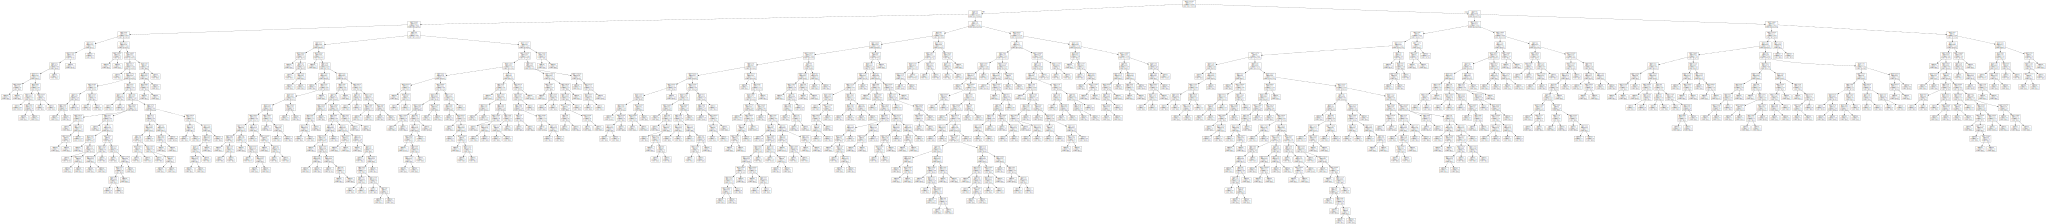

In [46]:
from sklearn import tree
import graphviz 
dot_dat = tree.export_graphviz(clf_tree, out_file=None) 
graph = graphviz.Source(dot_dat) 
graph

### Usando f_regression for seleção de variável

In [47]:
from sklearn.feature_selection import f_regression

df_new3 = pd.DataFrame(SelectKBest(f_regression, k=7).fit_transform(df.drop(["mau"],axis=1),df["mau"]))
df_new3.head()

,0,1,2,3,4,5,6
0,41.0,17.0,12.0,35.9,11.90,0.504108,3.767992
1,30.0,13.0,8.0,46.7,17.88,1.352694,6.997266
2,40.0,15.0,14.0,61.8,10.64,3.438997,3.136523
3,41.0,15.0,14.0,72.0,29.67,4.165668,17.196732
4,57.0,7.0,37.0,25.6,15.86,1.498199,2.561961


accuracy score :  0.8090909090909091
f1 score :  0.7204832158170736
precision score :  0.7592430801000754
recall score :  0.7012404122376552
Confusion matrix, without normalization
[[1012  215]
 [ 226  197]]


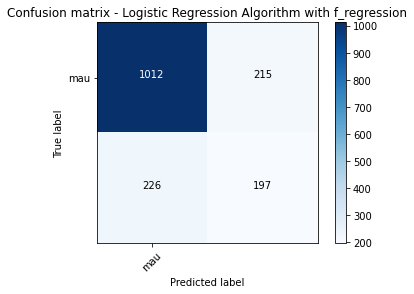

In [48]:
# Running the logistic regression algorithm using the features selected from f_regression test

x = df_new3
y = df["mau"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre2 = logreg.predict(x_te)
a9 = accuracy_score(y_te,y_pre2)
f9 = f1_score(y_te, y_pre2, average="macro")
p9 = precision_score(y_te, y_pre2, average="macro")
r9 = recall_score(y_te, y_pre2, average="macro")
print("accuracy score : ",a9)
print("f1 score : ",f9)
print("precision score : ",p9)
print("recall score : ",r9)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
                      title='Confusion matrix - Logistic Regression Algorithm with f_regression')

plt.show()

accuracy score :  0.7357575757575757
f1 score :  0.6485272735800385
precision score :  0.6508106500074371
recall score :  0.6465114128330067
Confusion matrix, without normalization
[[1018  209]
 [ 227  196]]


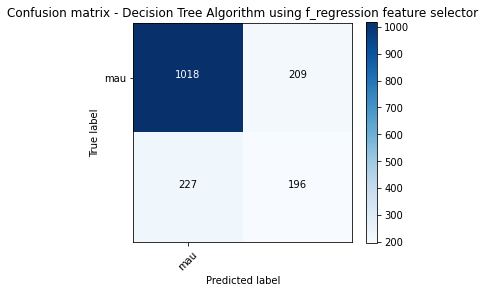

In [49]:
# Decision Tree classifier usando f_regression test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a10 = accuracy_score(y_te,y_pre)
f10 = f1_score(y_te, y_pre, average="macro")
p10= precision_score(y_te, y_pre, average="macro")
r10 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a10)
print("f1 score : ",f10)
print("precision score : ",p10)
print("recall score : ",r10)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
                     title='Confusion matrix - Decision Tree Algorithm using f_regression feature selector')

plt.show()

# Comparando modelos de machine learning 
 - Escolher o melhor modelo para nosso problema( Regressão Logística), Explicado abaixo e otimizado com o valor de threshold alterado de 0,5 ( valor default)

In [50]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree'],
    'Feature Selection Method' : ['None','None','Pearson corr_fact','Pearson corr_fact','chi2 test','chi2 test','f_classif','f_classif','f_regression','f_regression'],
    'Accuracy Score': [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10],
    'Recall Score' : [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10],
    'F1 Score' : [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10],
    'Precision Score' : [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
})

In [51]:
models

,Model,Feature Selection Method,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Logistic Regression,None,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,None,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression,Pearson corr_fact,0.780000,0.619718,0.634523,0.728186
3,Decision Tree,Pearson corr_fact,0.686667,0.587170,0.587504,0.587855
4,Logistic Regression,chi2 test,0.809091,0.701240,0.720483,0.759243
5,Decision Tree,chi2 test,0.732727,0.644474,0.645914,0.647492
6,Logistic Regression,f_classif,0.809091,0.701240,0.720483,0.759243
7,Decision Tree,f_classif,0.732727,0.645248,0.646476,0.647801
8,Logistic Regression,f_regression,0.809091,0.701240,0.720483,0.759243
9,Decision Tree,f_regression,0.735758,0.646511,0.648527,0.650811


In [52]:
pd.pivot_table(models,index = ["Feature Selection Method","Model"])

Accuracy Score  ...  Recall Score
Feature Selection Method Model                                ...              
None                     Decision Tree              1.000000  ...      1.000000
                         Logistic Regression        1.000000  ...      1.000000
Pearson corr_fact        Decision Tree              0.686667  ...      0.587170
                         Logistic Regression        0.780000  ...      0.619718
chi2 test                Decision Tree              0.732727  ...      0.644474
                         Logistic Regression        0.809091  ...      0.701240
f_classif                Decision Tree              0.732727  ...      0.645248
                         Logistic Regression        0.809091  ...      0.701240
f_regression             Decision Tree              0.735758  ...      0.646511
                         Logistic Regression        0.809091  ...      0.701240

[10 rows x 4 columns]


- maior recall é utilizando o f-classif na regressão logística e chi2- melhor método a ser utilizado.
- O limite (threshold)  é definido por padrão como 0,5 na regressão logística!

- Obviamente, alterar o limite afeta o desempenho do modelo e isso pode ser observado na próxima seção.

- Isso pode ser estendido ainda mais pela reamostragem dos dados para aumentar a pontuação RECALL

# Mudando o threshold para observar peformance

Recall metric in the testing dataset:  0.9385342789598109
Accuracy score for the testing dataset:  0.5872727272727273
Confusion matrix, without normalization
[[572 655]
 [ 26 397]]

Recall metric in the testing dataset:  0.8274231678486997
Accuracy score for the testing dataset:  0.693939393939394
Confusion matrix, without normalization
[[795 432]
 [ 73 350]]

Recall metric in the testing dataset:  0.7281323877068558
Accuracy score for the testing dataset:  0.7721212121212121
Confusion matrix, without normalization
[[966 261]
 [115 308]]

Recall metric in the testing dataset:  0.5981087470449172
Accuracy score for the testing dataset:  0.7915151515151515
Confusion matrix, without normalization
[[1053  174]
 [ 170  253]]

Recall metric in the testing dataset:  0.4799054373522459
Accuracy score for the testing dataset:  0.8090909090909091
Confusion matrix, without normalization
[[1132   95]
 [ 220  203]]

Recall metric in the testing dataset:  0.35933806146572106
Accuracy score for the t

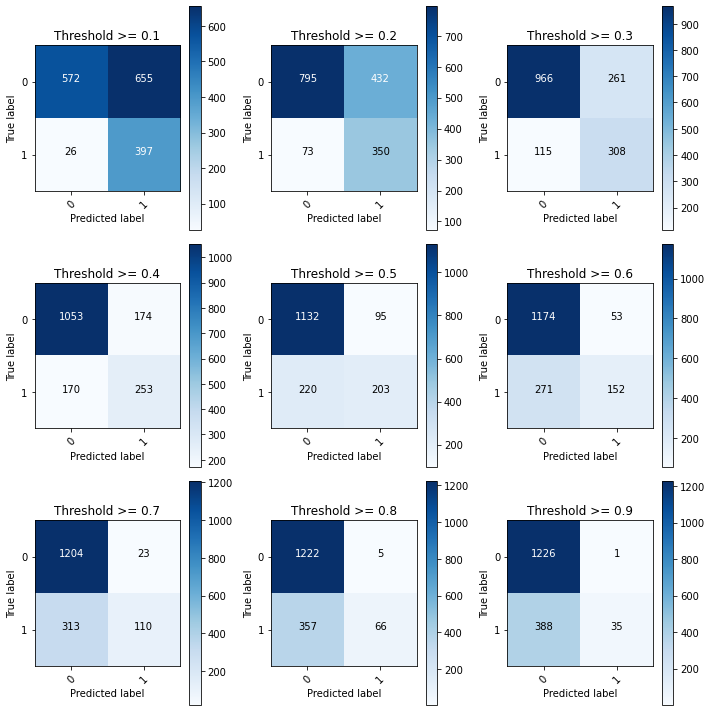

In [53]:
lr = LogisticRegression()
lr.fit(x_tr,y_tr)
y_pred_proba = lr.predict_proba(x_te)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] >= i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_te,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    rec1 = recall_score(y_te, y_test_predictions_high_recall)
    acc= 1.0*(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[0,1])
    print("Recall metric in the testing dataset: ",rec1)
    print("Accuracy score for the testing dataset: ",acc)
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
    print("")

Percentagem de bons e maus pagadores 



In [54]:
total_len = len(df['mau'])
percentage_labels = (df['mau'].value_counts()/total_len)*100
percentage_labels

0    74.88
1    25.12
Name: mau, dtype: float64

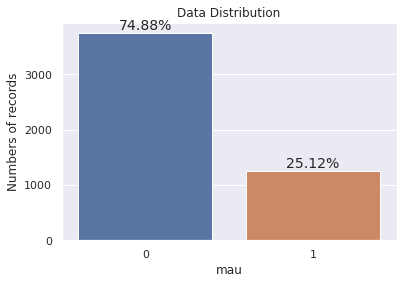

In [55]:
sns.set()
sns.countplot(x_basic.mau).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("mau")
ax.set_ylabel("Numbers of records")
plt.show()

#74.88% dos empréstimos serão pagos 




- Correlação de variáveis 

------------------------------------------------------------------------------------------------------------------------------

In [56]:
df.fillna((x_basic.median()), inplace=True)
# Get the correlation of the training dataset
df[df.columns[1:]].corr()

,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,mau
experiencia,1.000000,0.328398,0.511006,-0.016297,0.286104,0.250384,-0.258780
tempo_endereco,0.328398,1.000000,0.211169,-0.017647,0.103693,0.093347,-0.209655
renda,0.511006,0.211169,1.000000,0.012391,0.741948,0.816931,-0.041060
debito_renda,-0.016297,-0.017647,0.012391,1.000000,0.366540,0.310966,0.379351
cred_deb,0.286104,0.103693,0.741948,0.366540,1.000000,0.773914,0.186907
outros_debitos,0.250384,0.093347,0.816931,0.310966,0.773914,1.000000,0.080372
mau,-0.258780,-0.209655,-0.041060,0.379351,0.186907,0.080372,1.000000


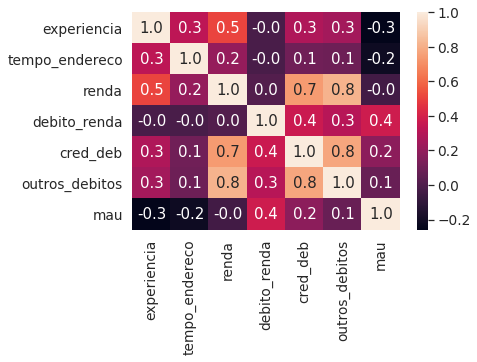

In [57]:
sns.set()
sns.set(font_scale=1.25)
sns.heatmap(df[df.columns[1:]].corr(),annot=True,fmt=".1f")
plt.show()

Detecção de Outliers 

In [58]:
# detecção de outliers por percentiles
def percentile_based_outlier(df, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(df, [diff, 100 - diff])
    #return minval, maxval
    return ((df < minval) | (df> maxval))


In [59]:
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold

In [60]:
def std_div(df, threshold=3):
    std = df.std()
    mean = df.mean()
    isOutlier = []
    for val in df:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

In [61]:
def outlierVote(df):
    x = percentile_based_outlier(df)
    y = mad_based_outlier(df)
    z = std_div(df)
    temp = zip(df.index, x, y, z)
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

In [62]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

TypeError: ignored

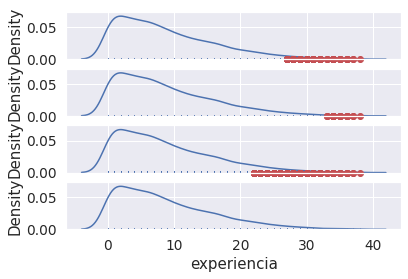

In [63]:
plotOutlier(df.experiencia)

In [ ]:
plotOutlier(df.idade)

In [ ]:
plotOutlier(df.renda)

In [ ]:
plotOutlier(df.debito_renda)

In [ ]:
plotOutlier(df.cred_deb)

In [ ]:
plotOutlier(df.outros_debitos)

In [ ]:
#Função peso de evidência e valor da informação

def iv_woe(df, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = df.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (df[ivars].dtype.kind in 'bifc') and (len(np.unique(df[ivars]))>10):
            binned_x = pd.qcut(df[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': df[target]})
        else:
            d0 = pd.DataFrame({'x': df[ivars], 'y': df[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF
iv, woe = iv_woe(df, target='mau', bins=20)

In [ ]:
woe # Tabela de peso de evidência 

In [ ]:
# matriz de correlação entre os coefiecientes 
corr_matrix = df.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [ ]:
print(iv) # valor da informação

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df.columns[1:]

In [ ]:
X = df.drop('mau', axis=1)
y = df.mau
features_label = df.columns[1:]
forest = RandomForestClassifier (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

In [ ]:
plt.title('Importância das variáveis')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#a variável "experiência" tem maior peso  como comprovado pelo valor da informação e pelo random forest desenvolvido acima.

In [ ]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
# EasyEnsembleClassifier

from imblearn.ensemble import EasyEnsembleClassifier

model = EasyEnsembleClassifier(base_estimator=None, n_estimators=100, n_jobs=1, random_state=1, 
                                   replacement=False, sampling_strategy='auto', verbose=0, 
                                   warm_start=False)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

EasyEnsembleClassifier()

In [ ]:
# Precisão do escore balanceada 
from sklearn.metrics import balanced_accuracy_score
predictions = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, predictions)

In [ ]:
# Matriz confusão
confusion_matrix(y_test, predictions)

In [ ]:
# Imprimir Relatório de Classificação 
from imblearn.metrics import classification_report_imbalanced
print(classification_report(y_test, predictions))


In [68]:
# Previsão de Risco dos atributos de um empréstimo por algoritmo de machine learning 
import numpy as np
import pandas as pd 
from copy import deepcopy
import random


from sklearn.preprocessing import LabelEncoder


import os

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score

from collections import defaultdict
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [69]:
# Reamostrando variáveis 
df_bal =df
df_bal.dropna(inplace=True) # Drop missing values


random.seed(1234)


count_class_0, count_class_1 = df_bal['mau'].value_counts()


df_class_0 = df_bal[df_bal['mau'] == 0]
df_class_1 = df_bal[df_bal['mau'] == 1]


df_class_1_over = df_class_1.sample(count_class_0, replace=True, random_state=1234)
df_bal = pd.concat([df_class_1_over, df_class_0], axis=0)

df_bal.reset_index(inplace = True)

In [70]:
df_bal['mau'].value_counts()

1    3744
0    3744
Name: mau, dtype: int64

In [ ]:
df_bal.dtypes.value_counts()

int64      5
float64    4
dtype: int64

In [71]:
# 
# Diferenciação entre variáveis numéricas e categóricas 
numerical = df_bal.apply(pd.Series.nunique, axis = 0)[df_bal.apply(pd.Series.nunique, axis = 0).values>10].index
categorical = df_bal.apply(pd.Series.nunique, axis = 0)[df_bal.apply(pd.Series.nunique, axis = 0).values<=10].index
numerical = [i for i in numerical if i != 'index']
categorical = [i for i in categorical if i != 'bad_loans']

In [72]:
 df_bal.apply(pd.Series.nunique, axis = 0)[df_bal.apply(pd.Series.nunique, axis = 0).values<=10]

mau    2
dtype: int64

In [73]:
import seaborn as sns
sns.set(style="darkgrid")

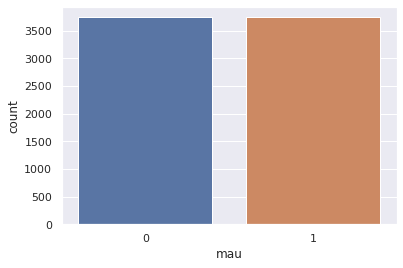

In [74]:
#Frequência de variáveis categóricas 
for var in categorical:
    plt.figure()
    ax = sns.countplot(x=var, data=df_bal)

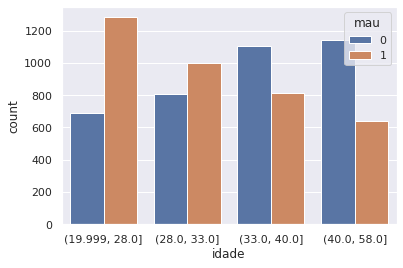

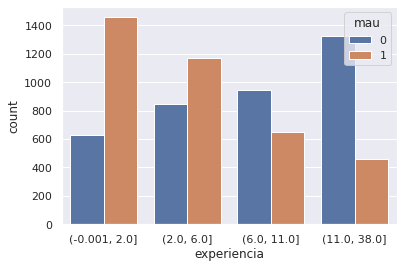

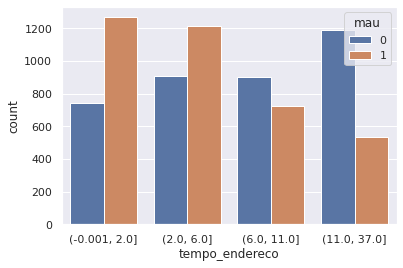

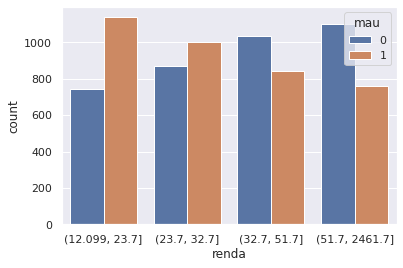

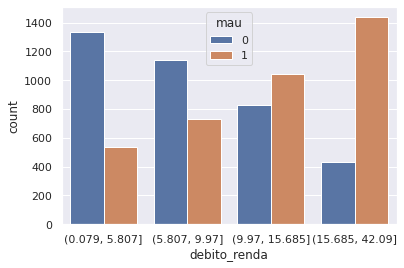

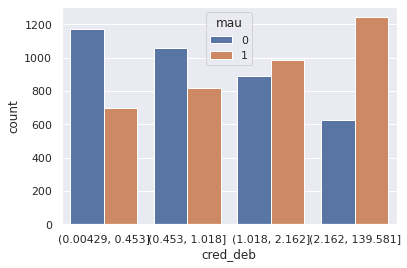

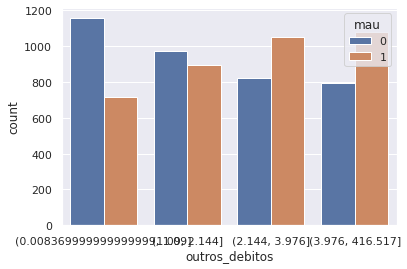

In [75]:
quantile_list = [0,0.25,0.5,0.75,1]
#quantile_labels = ['0-25Q','25-50Q','50-75Q','75-100Q']
df_bin = pd.DataFrame()
df_bin['mau'] = df_bal['mau']
for var in numerical:
    df_bin[var]=pd.qcut(df_bal[var],q=quantile_list,duplicates='drop')
    plt.figure()
    ax = sns.countplot(x=var, hue='mau',data=df_bin)

In [76]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        if self.p<alpha:
            return True # accept variable
        else:
            return False

In [78]:
accept_cT = []
reject_cT = []

In [79]:
#Initialize ChiSquare Class
cT = ChiSquare(df_bal)

#Feature Selection
for var in categorical:
    status = cT.TestIndependence(colX=var,colY="mau")  
    if status:
        accept_cT.append(var)
    else:
        reject_cT.append(var)

In [80]:
#Initialize ChiSquare Class
cT = ChiSquare(df_bin)

#Feature Selection
for var in numerical:
    status = cT.TestIndependence(colX=var,colY="mau")  
    if status:
        accept_cT.append(var)
    else:
        reject_cT.append(var)

In [81]:
# Baseado no Chi quadrado a variável deve ser removida 
reject_cT

[]

In [86]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

features = numerical + categorical
rf_sel = SelectFromModel(RandomForestClassifier(n_estimators = 100), threshold='median')
rf_sel.fit(df_bal[features], df_bal['mau'])

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [88]:
random_forest_feat = df_bal[features].columns[rf_sel.get_support()]
print(len(random_forest_feat))
print(random_forest_feat)

4
Index(['experiencia', 'debito_renda', 'cred_deb', 'mau'], dtype='object')


In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gb_sel = SelectFromModel(GradientBoostingClassifier(n_estimators = 100), threshold='median')
gb_sel.fit(df_bal[features], df_bal['mau'])
gradient_boost_feat = df_bal[features].columns[gb_sel.get_support()]
print(len(gradient_boost_feat))
print(gradient_boost_feat)

8
Index(['idade', 'experiencia', 'tempo_endereco', 'renda', 'debito_renda',
       'cred_deb', 'outros_debitos', 'mau'],
      dtype='object')
